In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020-01,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020-01,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021-01,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020-01,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021-01,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-01,1614,2013-01,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1615,2013-01,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1616,2013-01,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-01,1617,2013-01,WA,Northbridge


# Filter Outliers

To git rid of outliers, we need to filter:

    * Properties sold before 2019
    * landsize over 2000 sqm
    * carspace,bedroom over 6
    * Properties price over 3M

In [4]:
df['sold_date']= df['sold_date'].astype('datetime64[ns]')
df['sold_date'] = df['sold_date'].dt.strftime('%Y')
df['sold_date'] = df['sold_date'].astype('int')
After2019_df = df[(df['sold_date']>2019)]
After2019_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,205/403 Newcastle Street,not recorded,2,2,72,2009,1,205/403 Newcastle Street Northbridge WA 6003,99,-31.942904,115.853147,6003,330000,Unit,420,2020-01,1396,2020,WA,Northbridge
1396,14/5 Antonas Road,not recorded,2,0,69,2010,1,14/5 Antonas Road Northbridge WA 6003,98,-31.944030,115.854829,6003,315000,Unit,0,1900-01,1397,2020,WA,Northbridge
1397,77/269 James Street,not recorded,2,2,78,2016,1,77/269 James Street Northbridge WA 6003,112,-31.946010,115.851866,6003,465000,Unit,0,1900-01,1398,2020,WA,Northbridge
1398,18/134 Aberdeen Street,not recorded,2,2,88,2005,1,18/134 Aberdeen Street Northbridge WA 6003,123,-31.945080,115.856474,6003,390000,Unit,0,1900-01,1399,2020,WA,Northbridge


In [5]:
Less2000sqm_df = After2019_df[(After2019_df['land_size']<2000)]
carspaceLessThan7_df = Less2000sqm_df[(Less2000sqm_df['car_space']<7)]
BedroomsLessthan7_df = carspaceLessThan7_df[(carspaceLessThan7_df['bedrooms']<7)]
filtered_df = BedroomsLessthan7_df[(BedroomsLessthan7_df['price']<3000000)]
filtered_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,205/403 Newcastle Street,not recorded,2,2,72,2009,1,205/403 Newcastle Street Northbridge WA 6003,99,-31.942904,115.853147,6003,330000,Unit,420,2020-01,1396,2020,WA,Northbridge
1396,14/5 Antonas Road,not recorded,2,0,69,2010,1,14/5 Antonas Road Northbridge WA 6003,98,-31.944030,115.854829,6003,315000,Unit,0,1900-01,1397,2020,WA,Northbridge
1397,77/269 James Street,not recorded,2,2,78,2016,1,77/269 James Street Northbridge WA 6003,112,-31.946010,115.851866,6003,465000,Unit,0,1900-01,1398,2020,WA,Northbridge
1398,18/134 Aberdeen Street,not recorded,2,2,88,2005,1,18/134 Aberdeen Street Northbridge WA 6003,123,-31.945080,115.856474,6003,390000,Unit,0,1900-01,1399,2020,WA,Northbridge


# Data Preporcessing

In [6]:
#only getting landed properties for the machine learning
house = filtered_df[(filtered_df['property_type']=='House') | (filtered_df['property_type']=='Villa') | (filtered_df['property_type']=='Townhouse')]
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,115.867500,6000,1308000,House,700,2018-01,7,2021,WA,Perth
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,115.864298,6000,880000,House,550,2018-01,8,2020,WA,Perth
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,115.871931,6000,447500,Townhouse,460,2013-01,9,2020,WA,Perth
21,11 Lindsay Street,Meryl Carter,2,3,155,2010,2,11 Lindsay Street Perth WA 6000,240,-31.946328,115.863013,6000,1100000,House,780,2021-01,22,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,43 Mountjoy Road,not recorded,2,4,312,1960,2,43 Mountjoy Road Nedlands WA 6009,1012,-31.983957,115.800993,6009,1650000,House,0,1900-01,1223,2020,WA,Nedlands
1376,43 John Street,Claude Iaconi,2,2,116,1996,1,43 John Street Northbridge WA 6003,174,-31.945219,115.853374,6003,620000,Townhouse,0,1900-01,1377,2021,WA,Northbridge
1384,16 Kakulas Crescent,Claude Iaconi,2,3,250,2005,2,16 Kakulas Crescent Northbridge WA 6003,246,-31.945229,115.857610,6003,1250000,House,0,1900-01,1385,2021,WA,Northbridge
1389,107/228 James Street,not recorded,2,3,123,1995,1,107/228 James Street Northbridge WA 6003,158,-31.946032,115.853239,6003,415000,Townhouse,0,1900-01,1390,2020,WA,Northbridge


In [7]:
house.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'postcode', 'price', 'property_type', 'rent', 'rent_date', 'sale_id',
       'sold_date', 'state', 'suburb'],
      dtype='object')

In [8]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,13] = 1
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,13]= 2
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,13] = 3
# house

In [9]:
house['perth'] = ''
house['east_perth'] = ''
house['west_perth'] = ''
house['northbridge'] = ''
house['crawley'] = ''
house['nedlands'] = ''
# house['villa'] = ''
# house['townhouse'] = ''
# house['house'] = ''

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [10]:
for i in range(0,len(house['sale_id'])):
    if house.iloc[i,19] =='Perth':
        house.iloc[i,20] = 1
        house.iloc[i,21:26] = 0
    elif house.iloc[i,19] =='East Perth':
        house.iloc[i,21] = 1
        house.iloc[i,20] = 0
        house.iloc[i,22:26] = 0
    elif house.iloc[i,19] =='West Perth':
        house.iloc[i,22] = 1
        house.iloc[i,20:22] = 0
        house.iloc[i,23:26] = 0
    elif house.iloc[i,19] =='Northbridge':
        house.iloc[i,23] = 1
        house.iloc[i,20:23] = 0
        house.iloc[i,24:26] = 0
    elif house.iloc[i,19] =='Crawley':
        house.iloc[i,24] = 1
        house.iloc[i,20:24] = 0
        house.iloc[i,25] = 0
    elif house.iloc[i,19] =='Nedlands':
        house.iloc[i,25] = 1
        house.iloc[i,20:25] = 0
        
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,26] = 1
#         house.iloc[i,27:29] = 0
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,27]= 1
#         house.iloc[i,26]= 0
#         house.iloc[i,28]= 0
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,28] = 1
#         house.iloc[i,26:28] = 0
        
house

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,sale_id,sold_date,state,suburb,perth,east_perth,west_perth,northbridge,crawley,nedlands
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,2,2020,WA,Perth,1,0,0,0,0,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,7,2021,WA,Perth,1,0,0,0,0,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,8,2020,WA,Perth,1,0,0,0,0,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,9,2020,WA,Perth,1,0,0,0,0,0
21,11 Lindsay Street,Meryl Carter,2,3,155,2010,2,11 Lindsay Street Perth WA 6000,240,-31.946328,...,22,2021,WA,Perth,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,43 Mountjoy Road,not recorded,2,4,312,1960,2,43 Mountjoy Road Nedlands WA 6009,1012,-31.983957,...,1223,2020,WA,Nedlands,0,0,0,0,0,1
1376,43 John Street,Claude Iaconi,2,2,116,1996,1,43 John Street Northbridge WA 6003,174,-31.945219,...,1377,2021,WA,Northbridge,0,0,0,1,0,0
1384,16 Kakulas Crescent,Claude Iaconi,2,3,250,2005,2,16 Kakulas Crescent Northbridge WA 6003,246,-31.945229,...,1385,2021,WA,Northbridge,0,0,0,1,0,0
1389,107/228 James Street,not recorded,2,3,123,1995,1,107/228 James Street Northbridge WA 6003,158,-31.946032,...,1390,2020,WA,Northbridge,0,0,0,1,0,0


In [11]:
# Assign the data to X and y
X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "perth", "west_perth", "east_perth", "northbridge", "crawley", "nedlands"]]
y = house["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(223, 12) (223, 1)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

ERROR! Session/line number was not unique in database. History logging moved to new session 251


In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Keras Regression Deep Learning Model

In [15]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [16]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=12))
model.add(Dense(units=1))

In [17]:
model.compile(optimizer='Adam',
              loss='mse')
model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_data=(X_test_scaled,y_test_scaled),
    epochs=300)

Train on 167 samples, validate on 56 samples
Epoch 1/300
167/167 [==============================] - 0s 2ms/sample - loss: 0.9880 - val_loss: 0.9026
Epoch 2/300
167/167 [==============================] - 0s 120us/sample - loss: 0.9147 - val_loss: 0.8400
Epoch 3/300
167/167 [==============================] - 0s 152us/sample - loss: 0.8506 - val_loss: 0.7881
Epoch 4/300
167/167 [==============================] - 0s 161us/sample - loss: 0.7988 - val_loss: 0.7389
Epoch 5/300
167/167 [==============================] - 0s 174us/sample - loss: 0.7451 - val_loss: 0.6955
Epoch 6/300
167/167 [==============================] - 0s 150us/sample - loss: 0.7030 - val_loss: 0.6568
Epoch 7/300
167/167 [==============================] - 0s 156us/sample - loss: 0.6643 - val_loss: 0.6234
Epoch 8/300
167/167 [==============================] - 0s 174us/sample - loss: 0.6289 - val_loss: 0.5935
Epoch 9/300
167/167 [==============================] - 0s 144us/sample - loss: 0.5996 - val_loss: 0.5693
Epoch 10/300

167/167 [==============================] - 0s 114us/sample - loss: 0.1576 - val_loss: 0.2604
Epoch 78/300
167/167 [==============================] - 0s 126us/sample - loss: 0.1565 - val_loss: 0.2583
Epoch 79/300
167/167 [==============================] - 0s 126us/sample - loss: 0.1559 - val_loss: 0.2564
Epoch 80/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1546 - val_loss: 0.2559
Epoch 81/300
167/167 [==============================] - 0s 114us/sample - loss: 0.1536 - val_loss: 0.2566
Epoch 82/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1522 - val_loss: 0.2570
Epoch 83/300
167/167 [==============================] - 0s 120us/sample - loss: 0.1508 - val_loss: 0.2569
Epoch 84/300
167/167 [==============================] - 0s 114us/sample - loss: 0.1498 - val_loss: 0.2570
Epoch 85/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1487 - val_loss: 0.2547
Epoch 86/300
167/167 [==============================] - 0s 

167/167 [==============================] - 0s 114us/sample - loss: 0.1205 - val_loss: 0.2353
Epoch 154/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1205 - val_loss: 0.2355
Epoch 155/300
167/167 [==============================] - 0s 120us/sample - loss: 0.1203 - val_loss: 0.2364
Epoch 156/300
167/167 [==============================] - 0s 96us/sample - loss: 0.1202 - val_loss: 0.2363
Epoch 157/300
167/167 [==============================] - 0s 96us/sample - loss: 0.1198 - val_loss: 0.2354
Epoch 158/300
167/167 [==============================] - 0s 96us/sample - loss: 0.1199 - val_loss: 0.2373
Epoch 159/300
167/167 [==============================] - 0s 96us/sample - loss: 0.1196 - val_loss: 0.2375
Epoch 160/300
167/167 [==============================] - 0s 96us/sample - loss: 0.1193 - val_loss: 0.2382
Epoch 161/300
167/167 [==============================] - 0s 96us/sample - loss: 0.1191 - val_loss: 0.2394
Epoch 162/300
167/167 [==============================] - 

167/167 [==============================] - 0s 114us/sample - loss: 0.1104 - val_loss: 0.2294
Epoch 230/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1103 - val_loss: 0.2309
Epoch 231/300
167/167 [==============================] - 0s 114us/sample - loss: 0.1101 - val_loss: 0.2312
Epoch 232/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1101 - val_loss: 0.2313
Epoch 233/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1097 - val_loss: 0.2308
Epoch 234/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1096 - val_loss: 0.2302
Epoch 235/300
167/167 [==============================] - 0s 102us/sample - loss: 0.1094 - val_loss: 0.2304
Epoch 236/300
167/167 [==============================] - 0s 108us/sample - loss: 0.1093 - val_loss: 0.2292
Epoch 237/300
167/167 [==============================] - 0s 102us/sample - loss: 0.1095 - val_loss: 0.2316
Epoch 238/300
167/167 [============================

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model_loss, model_accuracy = model.evaluate(
#     X_test_scaled, y_test_scaled, verbose=2)

# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

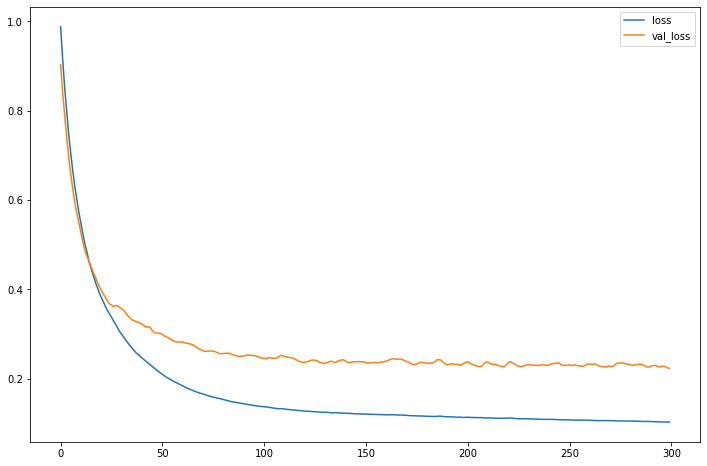

In [20]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 0.3364027767755871
MSE: 0.22312612411602234
RMSE: 0.4723622805813588
VarScore: 0.748921025314961


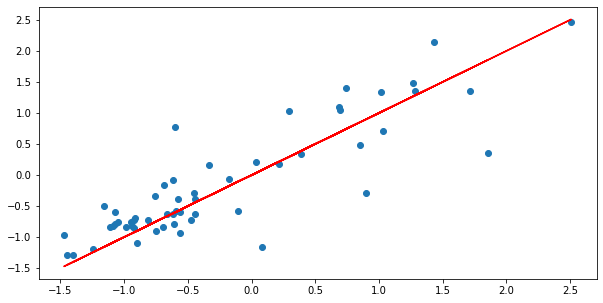

In [21]:
y_pred = model.predict(X_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test_scaled,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_scaled,y_pred)
# Perfect predictions
plt.plot(y_test_scaled,y_test_scaled,'r')

In [22]:
#test
# suburb needs to be categorical
X_test = X_scaler.transform([[4,3,2,175,186,2019,0,0,0,0,1,0]])
predictions = model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results

ERROR! Session/line number was not unique in database. History logging moved to new session 250


array([[795797.44]], dtype=float32)

In [24]:
# compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Keras_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,perth,west_perth,east_perth,northbridge,crawley,nedlands,Actual,Keras_Regression_Predicted
1194,4,3,2,1012,377,2007,0,0,0,0,0,1,2100000,1.383753e+06
1127,3,2,1,317,146,1989,0,0,0,0,0,1,1175000,6.270376e+05
1145,4,2,2,908,220,1929,0,0,0,0,0,1,1780000,7.906172e+05
831,2,1,1,95,70,2000,0,0,1,0,0,0,258000,2.084800e+06
1193,3,2,2,875,262,1999,0,0,0,0,0,1,1975000,8.410310e+05
344,1,1,1,76,52,2006,0,1,0,0,0,0,338000,6.949658e+05
376,3,1,2,85,82,1976,0,1,0,0,0,0,567500,3.979221e+05
1165,3,2,2,923,137,1959,0,0,0,0,0,1,1610000,1.282846e+06
205,1,1,1,46,46,2011,1,0,0,0,0,0,265000,9.204518e+05
792,3,2,2,206,110,1996,0,0,1,0,0,0,719000,1.884602e+06
